In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [2]:
data = pd.read_csv("Desktop/IIM_Ranchi/IIM_Ranchi_Dataset_Application.csv")
data.head()

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data = data.drop("Category", axis = 1)
# data['Ratings'] = data['Ratings'].apply(lambda ratings: 1 if ratings >= 4 else 0)
# data['Ratings'] = np.where(
#     (data['Ratings'] >= 4.0), 1, 0
# )
data.head() 

,Application,Ratings,Reviews,File_Size,Downloads,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data = data.drop(["App_Version", "Android_Supported"], axis = 1)
data.head()

,Application,Ratings,Reviews,File_Size,Downloads,Purchase_Price,Content Rating,Genres,Latest Updates
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [5]:
unique_types = data['Content Rating'].unique()
print(unique_types)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


In [6]:
unique_name = data['Application'].nunique()
print(unique_name)

9660


In [7]:
genres = data['Genres'].unique()
print(genres)

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [8]:
data = data.drop("Latest Updates", axis = 1)
data.head()

,Application,Ratings,Reviews,File_Size,Downloads,Purchase_Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,Everyone,Art & Design
1,Coloring book moana,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity


In [9]:
data['Content Rating'] = np.where(
    (data['Content Rating'] == 'Everyone') | (data['Content Rating'] == 'Unrated') | (data['Content Rating'].isnull()),
    1,
    np.where(
        (data['Content Rating'] == 'Teen') | (data['Content Rating'] == 'Everyone 10+'),
        0,
        -1
    )
)

In [10]:
data.head()

,Application,Ratings,Reviews,File_Size,Downloads,Purchase_Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,1,Art & Design
1,Coloring book moana,3.9,967,14M,"500,000+",0,1,Art & Design;Pretend Play
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",0,1,Art & Design
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,1,Art & Design;Creativity


In [11]:
df = data
df = df.drop(['Genres', 'Application'], axis = 1)
df.head()

,Ratings,Reviews,File_Size,Downloads,Purchase_Price,Content Rating
0,4.1,159,19M,"10,000+",0,1
1,3.9,967,14M,"500,000+",0,1
2,4.7,87510,8.7M,"5,000,000+",0,1
3,4.5,215644,25M,"50,000,000+",0,0
4,4.3,967,2.8M,"100,000+",0,1


In [12]:
df = df.drop(['File_Size'], axis = 1)

In [13]:
unique = df['Purchase_Price'].unique()
print(unique)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [14]:
import seaborn as sns

<>:2: SyntaxWarning: invalid escape sequence '\+'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\+'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/zc/r0mm_4tn4sn3grg8djpslz8c0000gn/T/ipykernel_3455/2224902014.py:2: SyntaxWarning: invalid escape sequence '\+'
  df['Downloads'] = df['Downloads'].replace({'\+': '', ',': '', 'Free': 0}, regex=True).astype(int)
/var/folders/zc/r0mm_4tn4sn3grg8djpslz8c0000gn/T/ipykernel_3455/2224902014.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Purchase_Price'] = df['Purchase_Price'].replace({'\$': '', 'Everyone': '0'}, regex=True).astype(float).astype(int)


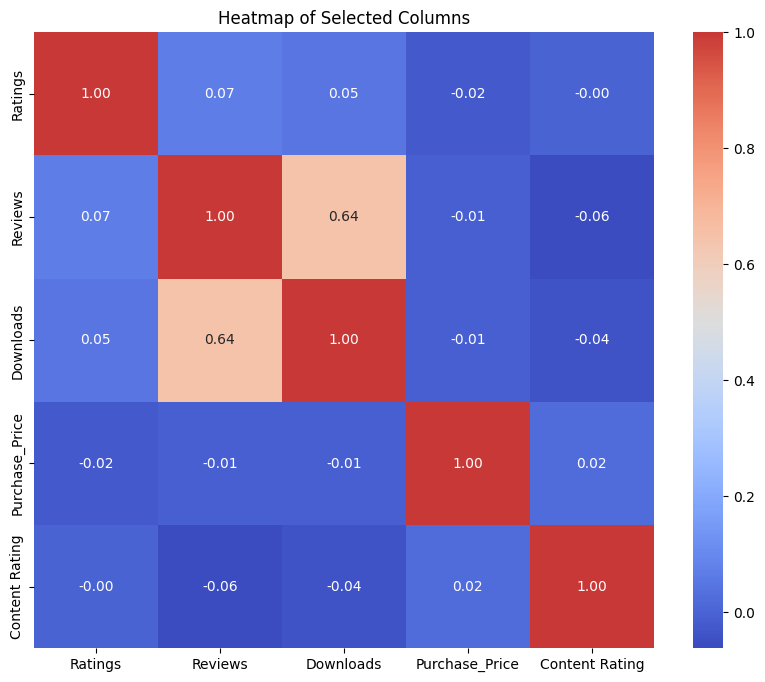

In [15]:
df['Reviews'] = df['Reviews'].replace({'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['Downloads'] = df['Downloads'].replace({'\+': '', ',': '', 'Free': 0}, regex=True).astype(int)
df['Purchase_Price'] = df['Purchase_Price'].replace({'\$': '', 'Everyone': '0'}, regex=True).astype(float).astype(int)

# Generate correlation matrix
correlation_matrix = df[['Ratings', 'Reviews', 'Downloads', 'Purchase_Price', 'Content Rating']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    center = 0.5,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Heatmap of Selected Columns')
plt.show()

In [16]:
# Using Weight to calculate top 100 Applications and bottom 100 Applications
from sklearn.preprocessing import MinMaxScaler

In [17]:
df['Copied Ratings'] = df['Ratings']

In [18]:
# Normalize the factors
scaler = MinMaxScaler()
df[['Ratings', 'Downloads', 'Reviews', 'Purchase_Price']] = scaler.fit_transform(df[['Ratings', 'Downloads', 'Reviews', 'Purchase_Price']])

# Assign weights
 # Weight value depends on how important that factor is
weights = {'Ratings': 0.6, 'Downloads': 0.45, 'Reviews': 0.3, 'Purchase_Price':0.1}

# Calculate composite score
df['Score'] = (df['Ratings'] * weights['Ratings'] +
               df['Downloads'] * weights['Downloads'] +
               df['Reviews'] * weights['Reviews'] +
              df['Purchase_Price'] * weights['Purchase_Price'])

df_sorted = df.sort_values(by='Score', ascending=False)


# Displaying the index number of top 100 and bottom 100 applications

top_100 = df_sorted.head(100).index
bottom_100 = df_sorted.tail(100).index

print("Top 100 Applications are:")
print(top_100)

print("\nBottom 100:")
print(bottom_100)

Top 100 Applications are:
Index([ 2544,  3943,   381,   336,  3904,  2604,  2545,  2611,  3909,   382,
        4104,   335,  1917,  1872,  1750,  1700,  1654,  3896,  3665,  3928,
       10472,  2884,  2808,  2853,  5395,   411,   338,  3996,  3223,  3117,
        4098,  3234,  4150,  4234,   468,   391,  5856,   865,   451,   340,
        4096,  2554,  4144,  3523,  3565,  3454,  4170,  3232,  3127,   464,
        4153,   386,   341,   152,  9844,  3816,  3736,  3765,  3687,  4005,
        7536,  1869,  1966,  1842,  1751,  1705,  1655,  3994,   420,  3971,
         378,  1908,  1722,  3888,  2610,  2550,  2603,  3870,  3739,  3796,
        4115,  4676,   467,   431,   385,   342,  1885,  1702,  1662,  3879,
        3255,  4566,   403,   474,  4122,  2546,  4105,  3711,  3703,  4365],
      dtype='int64')

Bottom 100:
Index([10535, 10536, 10537, 10538, 10539, 10541, 10542, 10543, 10544, 10545,
       10546, 10547, 10548, 10550, 10551, 10553, 10555, 10557, 10558, 10559,
       10560, 1

In [19]:
# Displaying name of top 100 applications
top_application_names = data.loc[df_sorted.head(100).index, 'Application']
print(top_application_names)


2544              Facebook
3943              Facebook
381     WhatsApp Messenger
336     WhatsApp Messenger
3904    WhatsApp Messenger
               ...        
2546         Facebook Lite
4105         Facebook Lite
3711             MX Player
3703             MX Player
4365             MX Player
Name: Application, Length: 100, dtype: object


In [20]:
# Displaying name of bottom 100 applications
bottom_application_names = data.loc[df_sorted.tail(100).index, 'Application']
print(bottom_application_names)

10535                FK Vojvodina
10536                  FK Liepaja
10537                  FK Teplice
10538                 FK Sarajevo
10539                   FK Vardar
                   ...           
10824                   Cardio-FR
10825          Naruto & Boruto FR
10831    payermonstationnement.fr
10835                    FR Forms
10838      Parkinson Exercices FR
Name: Application, Length: 100, dtype: object


In [21]:
# Visualizing top 100 and bottom 100 Appplications

/var/folders/zc/r0mm_4tn4sn3grg8djpslz8c0000gn/T/ipykernel_3455/242134864.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y=pd.concat([top_100, bottom_100]).index, data=pd.concat([top_100, bottom_100]), palette='coolwarm')


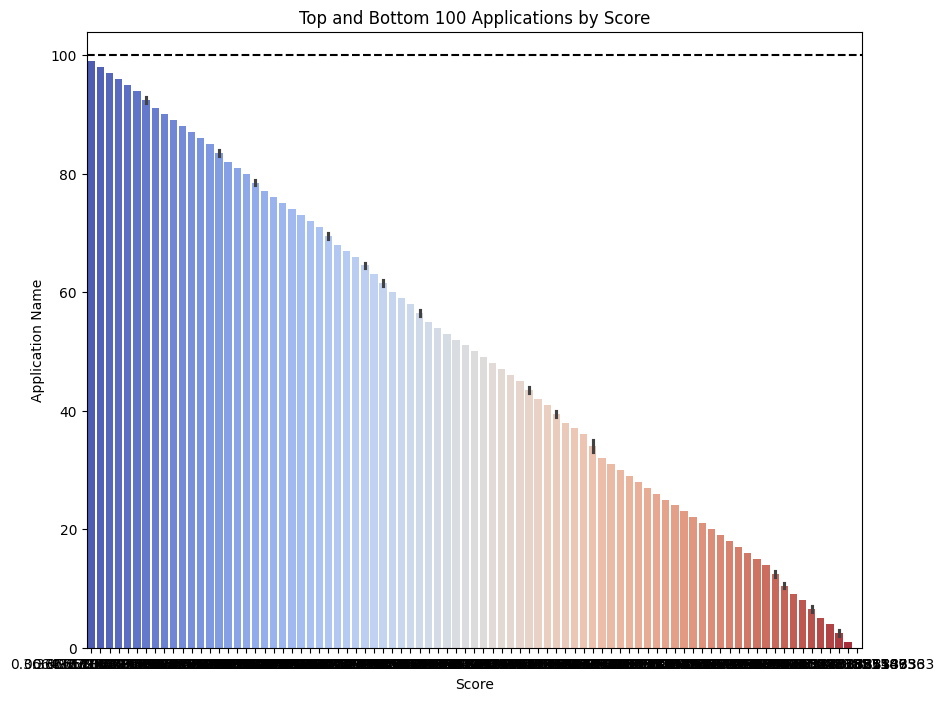

In [22]:
# Sorting the dataframe by score
df_sorted = df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Extracting top 100 and bottom 100
top_100 = df_sorted.head(100)
bottom_100 = df_sorted.tail(100)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y=pd.concat([top_100, bottom_100]).index, data=pd.concat([top_100, bottom_100]), palette='coolwarm')

# Highlighting top and bottom sections
plt.axhline(100, color='black', linestyle='--')

plt.title('Top and Bottom 100 Applications by Score')
plt.xlabel('Score')
plt.ylabel('Application Name')
plt.show()


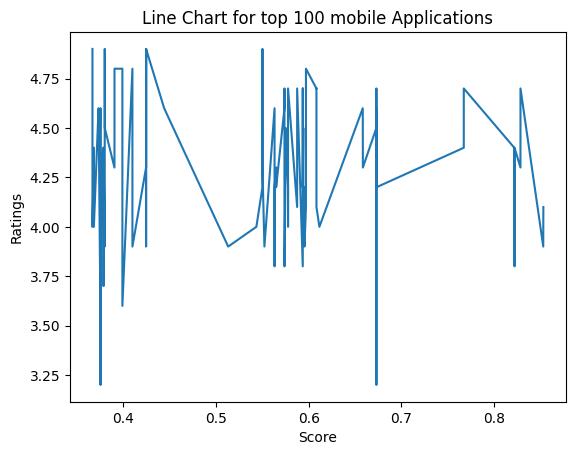

In [23]:
# Extracting ratings (assuming 'Score' column represents ratings)
x1 = df_sorted.head(100)['Score'].values
y1 = df.loc[df_sorted.head(100).index, 'Copied Ratings']

plt.plot(x1, y1)
plt.title("Line Chart for top 100 mobile Applications")
plt.xlabel("Score")
plt.ylabel("Ratings")
plt.show()

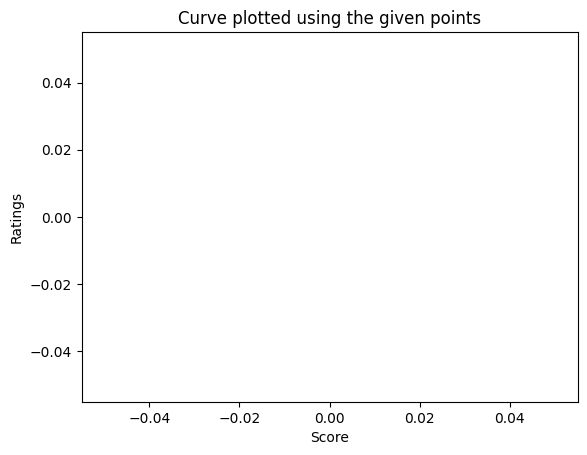

In [24]:
x2 = df.loc[df_sorted.tail(100).index, 'Copied Ratings']
y2 = df_sorted.tail(100)['Score'].values

plt.plot(x2, y2)
plt.title("Curve plotted using the given points")
plt.xlabel("Score")
plt.ylabel("Ratings")
plt.show()

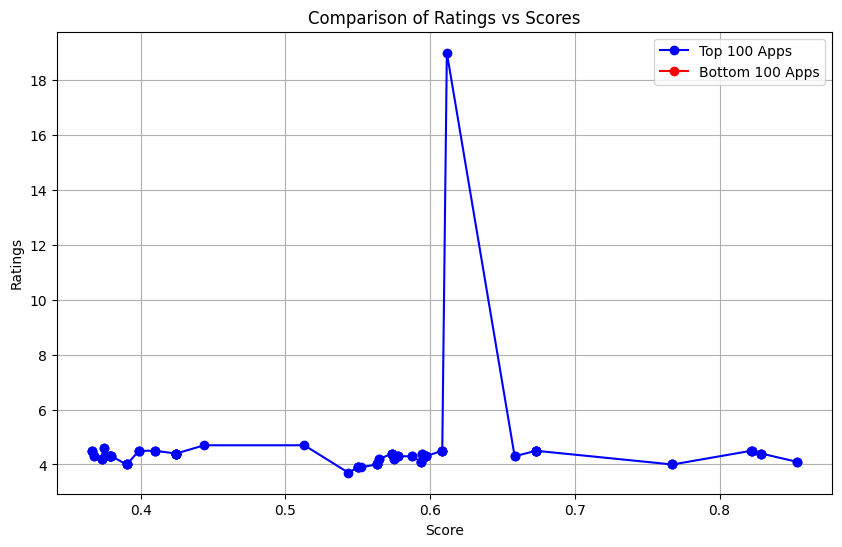

In [25]:
df_sorted = df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Extracting ratings for the top 100 and bottom 100
x1 = df_sorted.head(100)['Score'].values
y1 = df_sorted.head(100)['Copied Ratings'].values

x2 = df_sorted.tail(100)['Score'].values
y2 = df_sorted.tail(100)['Copied Ratings'].values

# Plotting both lines
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Top 100 Apps', marker='o', color='b')
plt.plot(x2, y2, label='Bottom 100 Apps', marker='o', color='r')

# Adding labels and title
plt.title("Comparison of Ratings vs Scores")
plt.xlabel("Score")
plt.ylabel("Ratings")

# Adding a legend
plt.legend()

# Displaying the chart
plt.grid(True)
plt.show()